# Proyecto Relaciones Contaminantes Salud

# Contaminante NOX

In [1]:
# Se van a agrupar los registros del contaminante en semanas

# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante = 'NOX'
# Se declaran las columnas a extraer de la base de datos
columns = ['timestamp', contaminante]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante = pd.read_csv('filled.csv', usecols=columns).dropna()
# Se convierten los strings a objeto datetime
strfdt = '%d-%b-%y %H'
dataframecontaminante['timestamp'] = pd.to_datetime(dataframecontaminante['timestamp'], errors = 'coerce', format=strfdt)
# Se eliminan los espacios vacios
dataframecontaminante = dataframecontaminante.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante = dataframecontaminante.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante

,timestamp,NOX
0,1993-01-01 00:00:00,6.750000
1,1993-01-01 00:00:00,8.500000
2,1993-01-01 00:00:00,11.000000
3,1993-01-01 00:00:00,17.500000
4,1993-01-01 01:00:00,4.000000
...,...,...
1128925,2018-12-31 23:00:00,74.400002
1128926,2018-12-31 23:00:00,207.000000
1128927,2018-12-31 23:00:00,27.000000
1128928,2018-12-31 23:00:00,70.099998


In [2]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante['timestamp'] = dataframecontaminante['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante

,timestamp,NOX
0,1993-01-01 00,6.750000
1,1993-01-01 00,8.500000
2,1993-01-01 00,11.000000
3,1993-01-01 00,17.500000
4,1993-01-01 01,4.000000
...,...,...
1128925,2018-12-31 23,74.400002
1128926,2018-12-31 23,207.000000
1128927,2018-12-31 23,27.000000
1128928,2018-12-31 23,70.099998


# (Año 2015)

In [3]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2015'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NOX
0,2015-01-01 00,21.900000
1,2015-01-01 00,10.600000
2,2015-01-01 00,9.200000
3,2015-01-01 00,6.600000
4,2015-01-01 00,6.200000
...,...,...
44489,2015-12-31 23,3.500000
44490,2015-12-31 23,24.600000
44491,2015-12-31 23,32.900002
44492,2015-12-31 23,13.600000


In [4]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NOX
0,2015-01-01 00:00:00,21.900000
1,2015-01-01 00:00:00,10.600000
2,2015-01-01 00:00:00,9.200000
3,2015-01-01 00:00:00,6.600000
4,2015-01-01 00:00:00,6.200000
...,...,...
44489,2015-12-31 23:00:00,3.500000
44490,2015-12-31 23:00:00,24.600000
44491,2015-12-31 23:00:00,32.900002
44492,2015-12-31 23:00:00,13.600000


In [5]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NOX,sem
0,2015-01-01 00:00:00,21.900000,53
1,2015-01-01 00:00:00,10.600000,53
2,2015-01-01 00:00:00,9.200000,53
3,2015-01-01 00:00:00,6.600000,53
4,2015-01-01 00:00:00,6.200000,53
...,...,...,...
44489,2015-12-31 23:00:00,3.500000,52
44490,2015-12-31 23:00:00,24.600000,52
44491,2015-12-31 23:00:00,32.900002,52
44492,2015-12-31 23:00:00,13.600000,52


In [6]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
2721,2015-12-01 00:00:00,19,C349
3052,2015-08-24 00:00:00,19,C186
3098,2015-07-15 00:00:00,19,C509
3254,2015-06-18 00:00:00,19,C509
8651,2015-05-09 00:00:00,19,C189
...,...,...,...
2923756,2015-06-10 00:00:00,19,J342
2931414,2015-08-18 00:00:00,19,M190
2934869,2015-09-09 00:00:00,19,C229
2943586,2015-11-20 00:00:00,19,K801


In [7]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2015-12-01,19,C349,48
1,2015-08-24,19,C186,34
2,2015-07-15,19,C509,28
3,2015-06-18,19,C509,24
4,2015-05-09,19,C189,18
...,...,...,...,...
53336,2015-06-10,19,J342,23
53337,2015-08-18,19,M190,33
53338,2015-09-09,19,C229,36
53339,2015-11-20,19,K801,46


In [8]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1068
2     1016
3     1026
4     1034
5      964
6     1036
7     1048
8      983
9      938
10     978
11     906
12    1011
13     932
14     978
15    1056
16    1018
17    1010
18     966
19    1044
20     988
21     999
22     977
23    1044
24    1021
25    1052
26    1022
27    1076
28    1106
29    1039
30    1060
31    1063
32    1072
33    1073
34    1087
35    1123
36    1077
37    1103
38    1105
39    1038
40    1129
41    1128
42    1117
43    1116
44    1115
45    1059
46     992
47    1066
48    1089
49    1106
50    1138
51     790
53     359
Name: sem, dtype: int64

In [9]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
<ipython-input-9-967a018ff37a>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño[contamin

,sem,NOX
0,1,27.2419
1,2,36.2909
2,3,31.404242
3,4,33.546707
4,5,28.747143
5,6,29.656219
6,7,29.458882
7,8,22.461928
8,9,20.311729
9,10,27.379906


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2015


 Contaminante NOX & CIE O809
Coeficiente de correlación de Pearson:  -0.10362969027633742
P-value:  0.46472393556634845
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6589
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.422
Time:                        07:36:31   Log-Likelihood:               -0.85528
No. Observations:                  41   AIC:                             5.711
Df Residuals:                      39   BIC:                             9.138
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.20102448586906288
El porcentaje de error de test es: 20.102448586906288


 Contaminante NOX & CIE O829
Coeficiente de correlación de Pearson:  0.06565983551156095
P-value:  0.643744604381178
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                   0.07423
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.787
Time:                        07:36:31   Log-Likelihood:                 2.8117
No. Observations:                  41   AIC:                            -1.623
Df Residuals:                      39   BIC:                             1.804
Df Model:                           1                                         
Covariance Type:            nonrobust                              

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante NOX & CIE O759
Coeficiente de correlación de Pearson:  0.29693412825336807
P-value:  0.032545762740140455
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     6.926
Date:                Fri, 18 Mar 2022   Prob (F-statistic):             0.0121
Time:                        07:36:31   Log-Likelihood:                 5.6189
No. Observations:                  41   AIC:                            -7.238
Df Residuals:                      39   BIC:                            -3.811
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante NOX & CIE O069
Coeficiente de correlación de Pearson:  -0.2644034947355496
P-value:  0.05820459177385886
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     2.819
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.101
Time:                        07:36:31   Log-Likelihood:                0.92817
No. Observations:                  41   AIC:                             2.144
Df Residuals:                      39   BIC:                             5.571
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante NOX & CIE K802
Coeficiente de correlación de Pearson:  0.27038417099296563
P-value:  0.05254401198154073
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2.005
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.165
Time:                        07:36:32   Log-Likelihood:                 3.2117
No. Observations:                  41   AIC:                            -2.423
Df Residuals:                      39   BIC:                             1.004
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

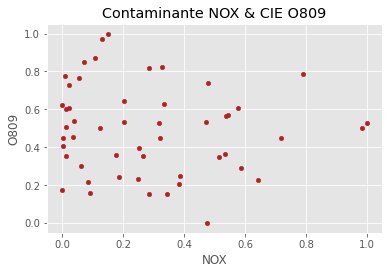

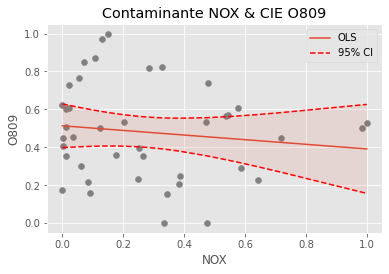

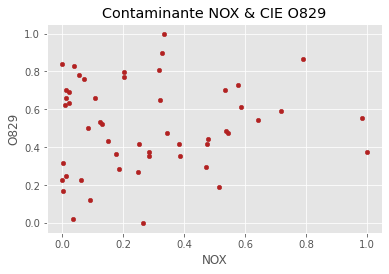

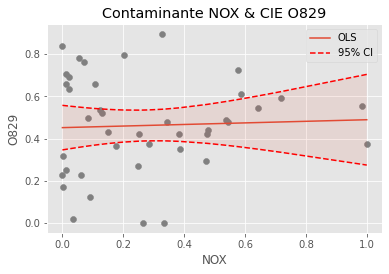

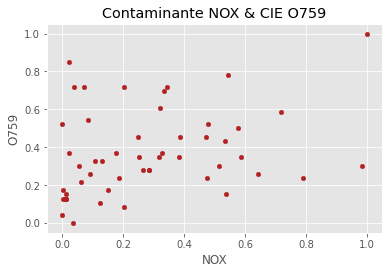

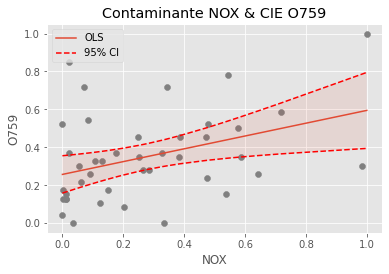

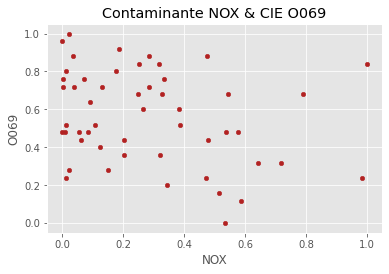

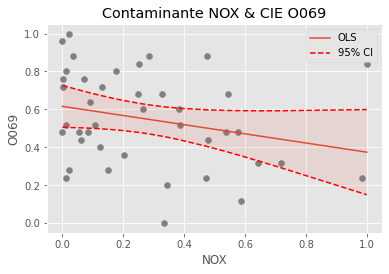

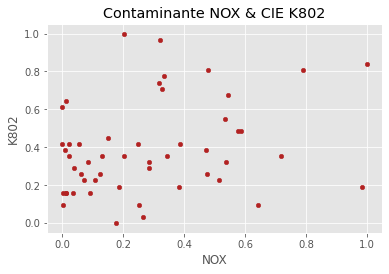

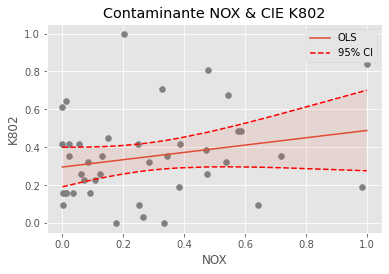

In [10]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


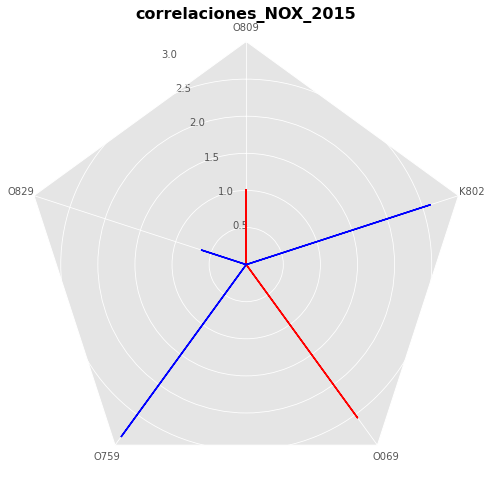

In [11]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')

# (Año 2016)

In [12]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NOX
0,2016-01-01 00,9.400000
1,2016-01-01 00,4.000000
2,2016-01-01 00,22.300000
3,2016-01-01 00,12.900000
4,2016-01-01 00,28.300000
...,...,...
37493,2016-12-31 22,46.800000
37494,2016-12-31 23,36.200001
37495,2016-12-31 23,15.200000
37496,2016-12-31 23,73.300003


In [13]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NOX
0,2016-01-01 00:00:00,9.400000
1,2016-01-01 00:00:00,4.000000
2,2016-01-01 00:00:00,22.300000
3,2016-01-01 00:00:00,12.900000
4,2016-01-01 00:00:00,28.300000
...,...,...
37493,2016-12-31 22:00:00,46.800000
37494,2016-12-31 23:00:00,36.200001
37495,2016-12-31 23:00:00,15.200000
37496,2016-12-31 23:00:00,73.300003


In [14]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NOX,sem
0,2016-01-01 00:00:00,9.400000,52
1,2016-01-01 00:00:00,4.000000,52
2,2016-01-01 00:00:00,22.300000,52
3,2016-01-01 00:00:00,12.900000,52
4,2016-01-01 00:00:00,28.300000,52
...,...,...,...
37493,2016-12-31 22:00:00,46.800000,52
37494,2016-12-31 23:00:00,36.200001,52
37495,2016-12-31 23:00:00,15.200000,52
37496,2016-12-31 23:00:00,73.300003,52


In [15]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
3481,04/18/2016 00:00,19,D433
5587,06/01/2016 00:00,19,I619
7319,08/18/2016 00:00,19,Q531
231176,10/05/2016 00:00,19,O429
235923,12/28/2015 00:00,19,Z980
...,...,...,...
979888,06/29/2016 00:00,19,O240
981083,11/08/2016 00:00,19,S407
981131,11/08/2016 00:00,19,S407
1011116,07/28/2016 00:00,19,S099


In [16]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%m/%d/%Y %H:%M'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2016-04-18,19,D433,16
1,2016-06-01,19,I619,22
2,2016-08-18,19,Q531,33
3,2016-10-05,19,O429,40
4,2016-12-18,19,T009,51
...,...,...,...,...
211,2016-06-29,19,O240,26
212,2016-11-08,19,S407,45
213,2016-11-08,19,S407,45
214,2016-07-28,19,S099,30


In [17]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1      5
2      1
3     11
4      4
5      6
6      3
7      1
8      3
9      7
10     2
11     4
12     2
13     1
14     6
15     6
16     6
17     3
18     6
19     6
20     2
21     3
22     5
23     5
24     1
25     7
26     5
27     4
28     2
29     2
30     8
31     2
32     7
33     6
34     1
35     2
36     4
37     5
38     2
39     5
40     4
41     2
42     6
43     4
44     2
45     7
46     5
47     2
48     3
49     3
50     7
51     6
52     4
Name: sem, dtype: int64

In [18]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

,sem,NOX
0,1,27.470044
1,2,31.803154
2,3,34.425224
3,4,38.430639
4,5,28.544429
5,6,33.763989
6,7,27.148664
7,8,19.926705
8,9,22.602606
9,10,22.93708


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2016


 Contaminante NOX & CIE F200
Coeficiente de correlación de Pearson:  -0.07936910880182241
P-value:  0.5759506062523441
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.2109
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.649
Time:                        07:36:35   Log-Likelihood:                -8.3215
No. Observations:                  41   AIC:                             20.64
Df Residuals:                      39   BIC:                             24.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.1443263607723556
El porcentaje de error de test es: 14.43263607723556


 Contaminante NOX & CIE O809
Coeficiente de correlación de Pearson:  -0.08635044512161205
P-value:  0.5427340708259913
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.1692
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.683
Time:                        07:36:35   Log-Likelihood:                -20.138
No. Observations:                  41   AIC:                             44.28
Df Residuals:                      39   BIC:                             47.70
Df Model:                           1                                         
Covariance Type:            nonrobust                              

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.38259281721551497
El porcentaje de error de test es: 38.259281721551496


 Contaminante NOX & CIE F312
Coeficiente de correlación de Pearson:  -0.05418018121426566
P-value:  0.7028458065815523
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                 3.103e-05
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.996
Time:                        07:36:36   Log-Likelihood:                 8.3480
No. Observations:                  41   AIC:                            -12.70
Df Residuals:                      39   BIC:                            -9.269
Df Model:                           1                                         
Covariance Type:            nonrobust                            

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante NOX & CIE C029
Coeficiente de correlación de Pearson:  -0.2004546931856097
P-value:  0.15419504524206418
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.078
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.305
Time:                        07:36:36   Log-Likelihood:                 33.746
No. Observations:                  41   AIC:                            -63.49
Df Residuals:                      39   BIC:                            -60.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Coeficiente de correlación de Pearson:  -0.1336224684372715
P-value:  0.3449723514380457
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.7549
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.390
Time:                        07:36:36   Log-Likelihood:                 14.691
No. Observations:                  41   AIC:                            -25.38
Df Residuals:                      39   BIC:                            -21.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

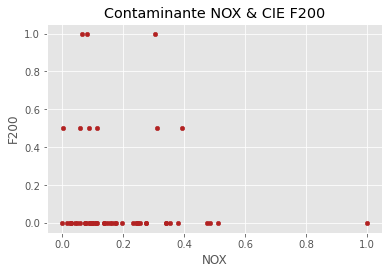

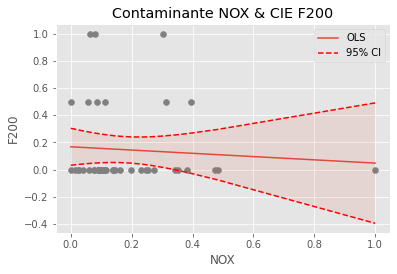

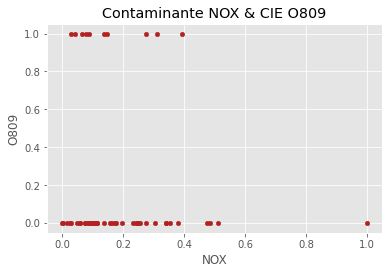

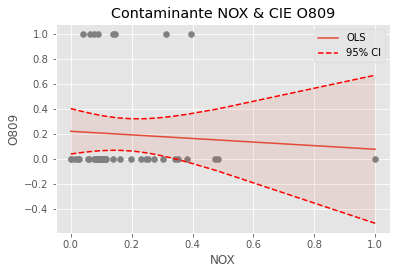

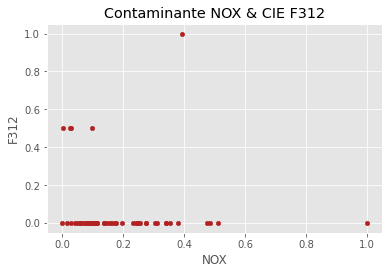

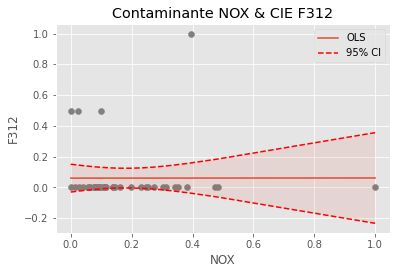

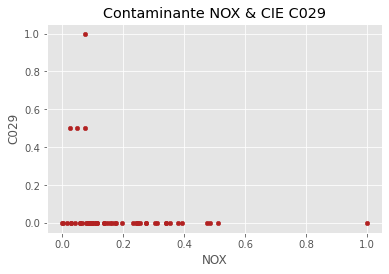

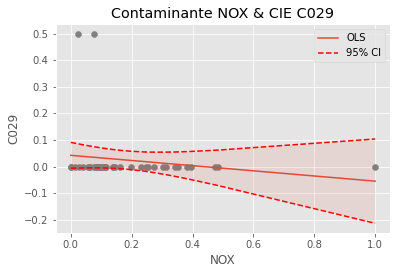

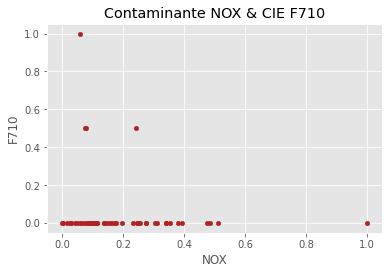

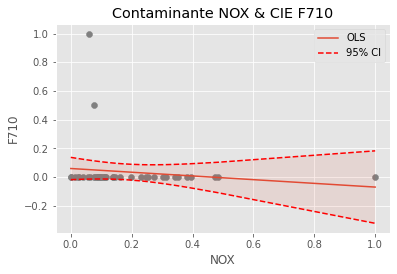

In [19]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.fillna(0)
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


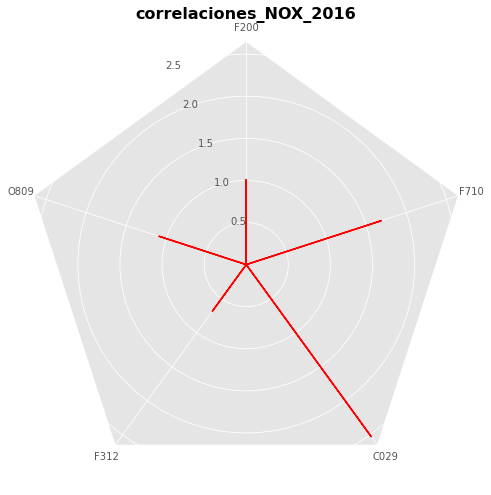

In [20]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')

# (Año 2017)

In [21]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2017'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NOX
0,2017-01-01 00,31.100000
1,2017-01-01 00,12.100000
2,2017-01-01 00,66.400000
3,2017-01-01 00,37.000000
4,2017-01-01 01,20.600000
...,...,...
44446,2017-12-31 23,37.000000
44447,2017-12-31 23,17.299999
44448,2017-12-31 23,28.700001
44449,2017-12-31 23,12.000000


In [22]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NOX
0,2017-01-01 00:00:00,31.100000
1,2017-01-01 00:00:00,12.100000
2,2017-01-01 00:00:00,66.400000
3,2017-01-01 00:00:00,37.000000
4,2017-01-01 01:00:00,20.600000
...,...,...
44446,2017-12-31 23:00:00,37.000000
44447,2017-12-31 23:00:00,17.299999
44448,2017-12-31 23:00:00,28.700001
44449,2017-12-31 23:00:00,12.000000


In [23]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NOX,sem
0,2017-01-01 00:00:00,31.100000,1
1,2017-01-01 00:00:00,12.100000,1
2,2017-01-01 00:00:00,66.400000,1
3,2017-01-01 00:00:00,37.000000,1
4,2017-01-01 01:00:00,20.600000,1
...,...,...,...
44446,2017-12-31 23:00:00,37.000000,1
44447,2017-12-31 23:00:00,17.299999,1
44448,2017-12-31 23:00:00,28.700001,1
44449,2017-12-31 23:00:00,12.000000,1


In [24]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, sep='|', usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
9836,2017-02-07 00:00:00,19,F120
11959,2017-10-24 00:00:00,19,E104
25534,2017-05-26 00:00:00,19,O680
27114,2017-04-14 00:00:00,19,T634
37193,2017-03-18 00:00:00,19,Q248
...,...,...,...
2720507,2017-08-21 00:00:00,19,N61X
2723613,2017-11-05 00:00:00,19,O809
2726650,2017-07-22 00:00:00,19,O809
2727207,2017-12-09 00:00:00,19,O809


In [25]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2017-02-07,19,F120,6
1,2017-10-24,19,E104,43
2,2017-05-26,19,O680,21
3,2017-04-14,19,T634,15
4,2017-03-18,19,Q248,11
...,...,...,...,...
56164,2017-08-21,19,N61X,34
56165,2017-11-05,19,O809,45
56166,2017-07-22,19,O809,29
56167,2017-12-09,19,O809,49


In [26]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1199
2     1069
3     1051
4     1048
5     1038
6     1014
7     1053
8     1011
9     1039
10    1110
11    1068
12    1016
13    1030
14     978
15     965
16     959
17     954
18     989
19     943
20    1134
21    1016
22     968
23    1105
24    1147
25    1033
26    1040
27    1142
28    1025
29    1118
30    1178
31    1138
32    1100
33    1203
34    1114
35    1160
36    1178
37    1128
38    1145
39    1113
40    1169
41    1237
42    1129
43    1105
44    1121
45    1133
46    1149
47    1121
48    1139
49    1132
50    1057
51    1054
52     904
Name: sem, dtype: int64

In [27]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

,sem,NOX
0,1,25.943446
1,2,33.713253
2,3,24.078
3,4,26.944724
4,5,31.351057
5,6,27.969577
6,7,23.048212
7,8,29.343927
8,9,22.263953
9,10,23.807781


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2017


 Contaminante NOX & CIE O809
Coeficiente de correlación de Pearson:  0.1641346874992962
P-value:  0.24494066497427155
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.02644
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.872
Time:                        07:36:42   Log-Likelihood:                -1.7423
No. Observations:                  41   AIC:                             7.485
Df Residuals:                      39   BIC:                             10.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.25116320554538235
El porcentaje de error de test es: 23.491146871597525


 Contaminante NOX & CIE O829
Coeficiente de correlación de Pearson:  0.07263038106568953
P-value:  0.6088679516081523
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.7084
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.405
Time:                        07:36:42   Log-Likelihood:                 1.5892
No. Observations:                  41   AIC:                            0.8217
Df Residuals:                      39   BIC:                             4.249
Df Model:                           1                                         
Covariance Type:            nonrobust                             

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.24336520569605757
El porcentaje de error de test es: 24.336520569605756


 Contaminante NOX & CIE O759
Coeficiente de correlación de Pearson:  -0.16288978126932566
P-value:  0.24858756522736972
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2773
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.601
Time:                        07:36:42   Log-Likelihood:                 18.257
No. Observations:                  41   AIC:                            -32.51
Df Residuals:                      39   BIC:                            -29.09
Df Model:                           1                                         
Covariance Type:            nonrobust                           

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.2606950598724413
El porcentaje de error de test es: 33.673111900190335


 Contaminante NOX & CIE O069
Coeficiente de correlación de Pearson:  -0.29466149104053735
P-value:  0.033962963352035094
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.5765
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.452
Time:                        07:36:42   Log-Likelihood:                 1.5104
No. Observations:                  41   AIC:                            0.9793
Df Residuals:                      39   BIC:                             4.406
Df Model:                           1                                         
Covariance Type:            nonrobust                           

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.19435433279496417
El porcentaje de error de test es: 19.435433279496415


 Contaminante NOX & CIE K802
Coeficiente de correlación de Pearson:  0.005361260272350427
P-value:  0.9699100981005399
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                   0.03548
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.852
Time:                        07:36:42   Log-Likelihood:                 4.3510
No. Observations:                  41   AIC:                            -4.702
Df Residuals:                      39   BIC:                            -1.275
Df Model:                           1                                         
Covariance Type:            nonrobust                            

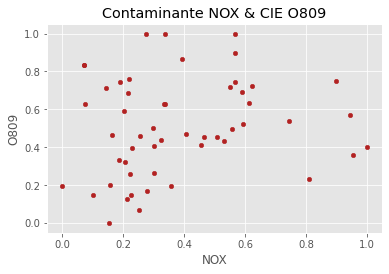

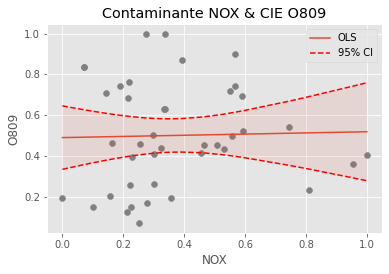

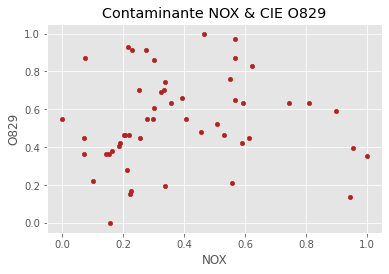

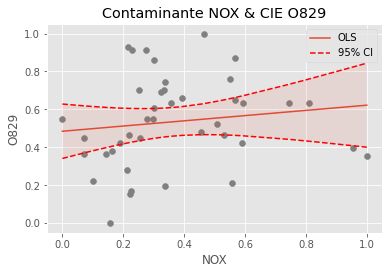

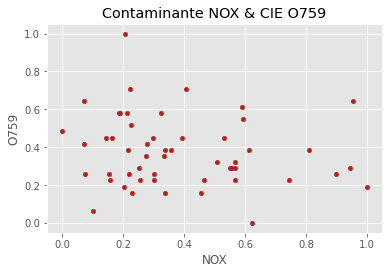

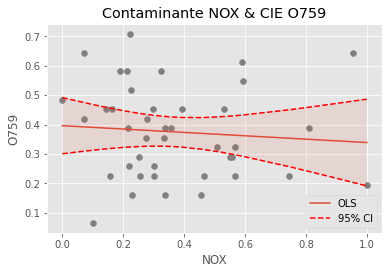

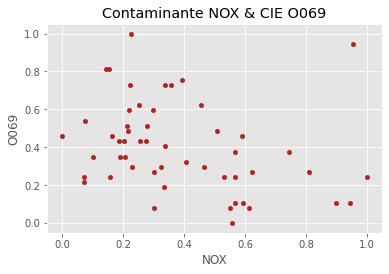

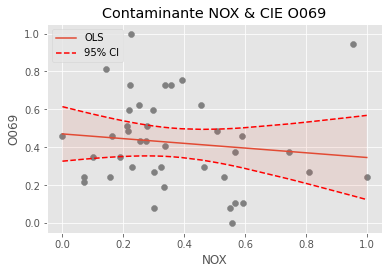

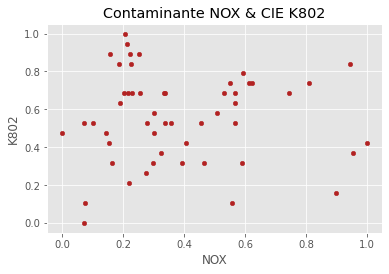

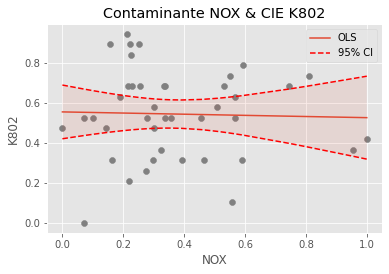

In [28]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


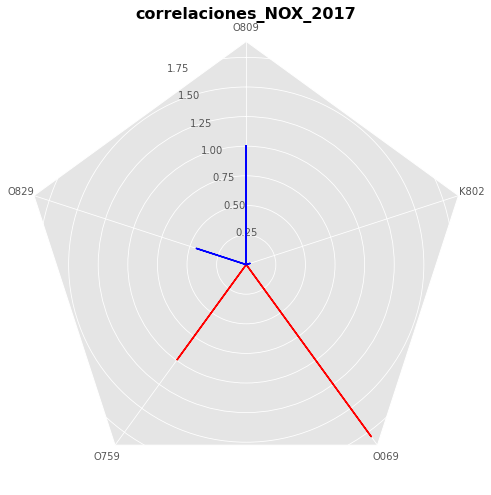

In [29]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')

# (Año 2018)

In [30]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2018'
dataframecontaminanteaño = dataframecontaminante.loc[dataframecontaminante['timestamp'].str.startswith(año)]
dataframecontaminanteaño = dataframecontaminanteaño.reset_index(drop=True)
dataframecontaminanteaño

,timestamp,NOX
0,2018-01-01 01,7.000000
1,2018-01-01 01,42.700000
2,2018-01-01 01,7.000000
3,2018-01-01 01,29.800000
4,2018-01-01 01,8.500000
...,...,...
41615,2018-12-31 23,74.400002
41616,2018-12-31 23,207.000000
41617,2018-12-31 23,27.000000
41618,2018-12-31 23,70.099998


In [31]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño['timestamp'] = pd.to_datetime(dataframecontaminanteaño['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño

,timestamp,NOX
0,2018-01-01 01:00:00,7.000000
1,2018-01-01 01:00:00,42.700000
2,2018-01-01 01:00:00,7.000000
3,2018-01-01 01:00:00,29.800000
4,2018-01-01 01:00:00,8.500000
...,...,...
41615,2018-12-31 23:00:00,74.400002
41616,2018-12-31 23:00:00,207.000000
41617,2018-12-31 23:00:00,27.000000
41618,2018-12-31 23:00:00,70.099998


In [32]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño['sem'] = dataframecontaminanteaño['sem'].apply(lambda x: x.week)
dataframecontaminanteaño

,timestamp,NOX,sem
0,2018-01-01 01:00:00,7.000000,1
1,2018-01-01 01:00:00,42.700000,1
2,2018-01-01 01:00:00,7.000000,1
3,2018-01-01 01:00:00,29.800000,1
4,2018-01-01 01:00:00,8.500000,1
...,...,...,...
41615,2018-12-31 23:00:00,74.400002,1
41616,2018-12-31 23:00:00,207.000000,1
41617,2018-12-31 23:00:00,27.000000,1
41618,2018-12-31 23:00:00,70.099998,1


In [33]:
# Se importan las librerias necesarias
import pandas as pd 

# Se cargan los datos de la base de datos 'EGRESO_'año'.csv'
colums = ['EGRESO', 'DIAG_INI', 'ENTIDAD']
entidad = 19
csvegresos = 'EGRESO_' + año + '.csv'
dataframeegresosaño = pd.read_csv(csvegresos, usecols=colums).dropna()
dataframeegresosaño = dataframeegresosaño.loc[dataframeegresosaño['ENTIDAD'] == entidad]
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI
3678,2018-11-15 00:00:00.000,19,N189
3709,2018-08-30 00:00:00.000,19,G562
7046,2018-05-21 00:00:00.000,19,E145
19178,2018-04-26 00:00:00.000,19,P073
100477,2018-08-28 00:00:00.000,19,F191
...,...,...,...
2603999,2018-09-12 00:00:00.000,19,J459
2604006,2018-04-05 00:00:00.000,19,S729
2616019,2018-04-10 00:00:00.000,19,R101
2617800,2018-07-18 00:00:00.000,19,C505


In [34]:
# Se importan las librerias necesarias
from epiweeks import Week, date

# Se convierten los string a objetos datetime en 'dataframe'
strfdtoriginal = '%Y-%m-%d %H:%M:%S.000'
dataframeegresosaño['EGRESO'] = pd.to_datetime(dataframeegresosaño['EGRESO'], errors = 'coerce', format=strfdtoriginal)
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
numaño = int(año) 
# Se agrega una columna con los numeros de semana
dataframeegresosaño['sem'] = dataframeegresosaño['EGRESO'].apply(lambda x: date(x.year, x.month, x.day))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: Week.fromdate(x))
dataframeegresosaño['sem'] = dataframeegresosaño['sem'].apply(lambda x: x.week)
dataframeegresosaño['EGRESO'] = dataframeegresosaño['EGRESO'].apply(lambda x: x if(x.year==numaño) else pd.NaT)   
dataframeegresosaño = dataframeegresosaño.dropna()
dataframeegresosaño = dataframeegresosaño.reset_index(drop=True)
dataframeegresosaño

,EGRESO,ENTIDAD,DIAG_INI,sem
0,2018-11-15,19,N189,46
1,2018-08-30,19,G562,35
2,2018-05-21,19,E145,21
3,2018-04-26,19,P073,17
4,2018-08-28,19,F191,35
...,...,...,...,...
54466,2018-09-12,19,J459,37
54467,2018-04-05,19,S729,14
54468,2018-04-10,19,R101,15
54469,2018-07-18,19,C505,29


In [35]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de egresos en cada semana
semanas = dataframeegresosaño['sem'].value_counts()
semanas = semanas.sort_index()
semanas

1     1014
2     1037
3     1081
4      984
5     1056
6      994
7     1057
8     1078
9     1039
10    1023
11    1098
12     977
13    1015
14    1024
15    1048
16    1092
17    1049
18     908
19     997
20     980
21    1054
22    1004
23    1087
24    1073
25    1008
26    1082
27    1074
28    1036
29    1056
30    1068
31    1118
32    1108
33    1083
34    1079
35    1136
36    1055
37    1157
38    1163
39    1179
40    1123
41    1192
42    1061
43    1082
44    1002
45    1073
46    1069
47     990
48     994
49     995
50     937
51     973
52     809
Name: sem, dtype: int64

In [36]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño = pd.DataFrame()
dataframesemanascontaminanteaño['sem'] = semanas.index
dataframesemanascontaminanteaño[contaminante] = ''
n = len(semanas.index)
for i in range (n):
    registrossem = dataframecontaminanteaño.loc[dataframecontaminanteaño['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante].mean()
    dataframesemanascontaminanteaño[contaminante][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño

,sem,NOX
0,1,42.139981
1,2,43.792161
2,3,39.693004
3,4,36.603932
4,5,34.3775
5,6,44.279625
6,7,41.696041
7,8,37.881961
8,9,41.252313
9,10,35.665157


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



2018


 Contaminante NOX & CIE O809
Coeficiente de correlación de Pearson:  -0.2264672147480764
P-value:  0.10643365097908337
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.171
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.286
Time:                        07:36:48   Log-Likelihood:                 3.5318
No. Observations:                  41   AIC:                            -3.064
Df Residuals:                      39   BIC:                            0.3636
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.28272180579221357
El porcentaje de error de test es: 30.373491297947268


 Contaminante NOX & CIE O829
Coeficiente de correlación de Pearson:  0.026942017468797683
P-value:  0.8496279167919595
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                   0.09986
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.754
Time:                        07:36:49   Log-Likelihood:                -5.1476
No. Observations:                  41   AIC:                             14.30
Df Residuals:                      39   BIC:                             17.72
Df Model:                           1                                         
Covariance Type:            nonrobust                            

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.2664082970521989
El porcentaje de error de test es: 26.640829705219886


 Contaminante NOX & CIE K802
Coeficiente de correlación de Pearson:  0.03313274215782838
P-value:  0.8156219680623001
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                  0.008171
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.928
Time:                        07:36:49   Log-Likelihood:                0.87170
No. Observations:                  41   AIC:                             2.257
Df Residuals:                      39   BIC:                             5.684
Df Model:                           1                                         
Covariance Type:            nonrobust                              

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



El error (rmse) de test es: 0.15248120532779544
El porcentaje de error de test es: 15.248120532779543


 Contaminante NOX & CIE O342
Coeficiente de correlación de Pearson:  -0.057840507730009524
P-value:  0.6837906130160275
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                  0.009020
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.925
Time:                        07:36:49   Log-Likelihood:                -9.8902
No. Observations:                  41   AIC:                             23.78
Df Residuals:                      39   BIC:                             27.21
Df Model:                           1                                         
Covariance Type:            nonrobust                           

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.




 Contaminante NOX & CIE N40X
Coeficiente de correlación de Pearson:  -0.03567916142250535
P-value:  0.8017278016115971
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.022
Method:                 Least Squares   F-statistic:                    0.1288
Date:                Fri, 18 Mar 2022   Prob (F-statistic):              0.722
Time:                        07:36:49   Log-Likelihood:               -0.53220
No. Observations:                  41   AIC:                             5.064
Df Residuals:                      39   BIC:                             8.492
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------

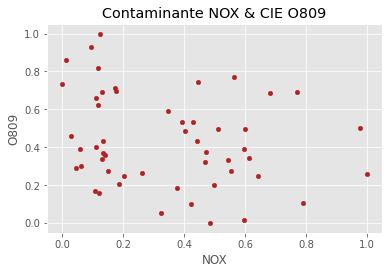

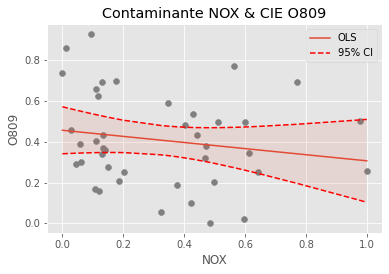

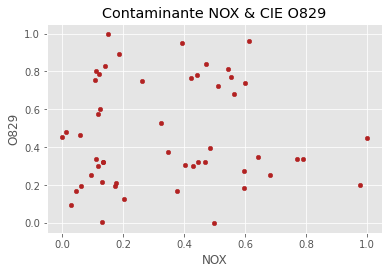

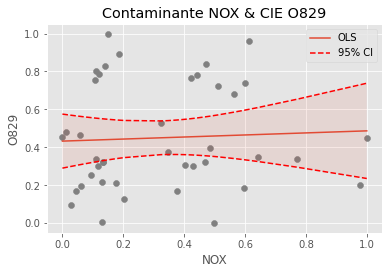

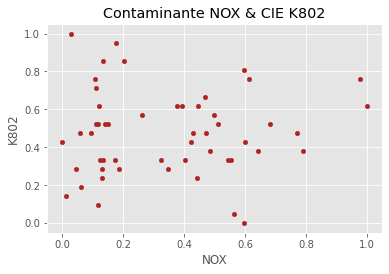

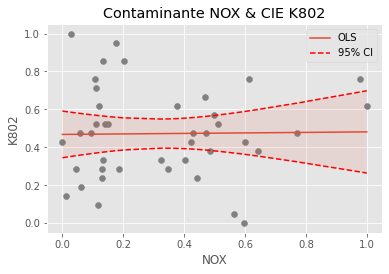

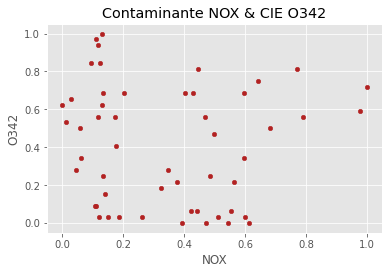

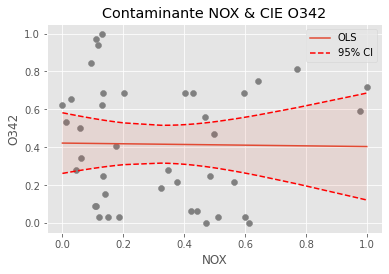

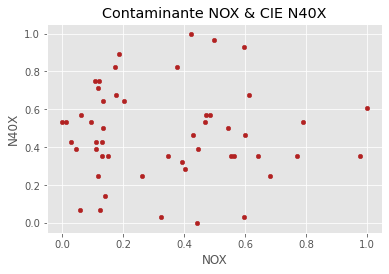

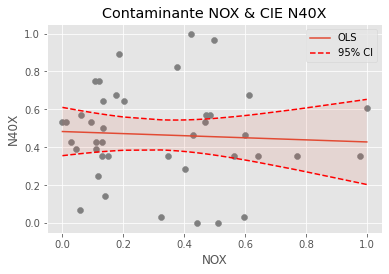

In [37]:
# Se crea el dataframe 'diagnosticosaño' con los nombres de los diferentes diagnosticos sin repeticion
diagnosticosaño = dataframeegresosaño['DIAG_INI'].value_counts()
# Se ordena del diagnostico con mayor numero de egresos al diagnostico con menor numero de egresos
diagnosticosaño = diagnosticosaño.sort_values(ascending = False)
# Se crea el dataframe 'cies2010' con los nombres de los diagnosticos, los numeros de las semanas, 
# y la cantidad de diagnosticos de dicha enfermedad en cada semana
ciesaño = dataframeegresosaño.groupby(['DIAG_INI', 'sem']).count()

# Se importan las librerias necesarias
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import string
# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib import style
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

import numpy as np

s_scaler = preprocessing.StandardScaler()
# Se crea la lista 'ind' con los indices de las semanas empezando con el 1
ind = []
n = len(semanas.index)
for i in range (n):
    ind.append(i+1)
    
# Se guardan las letras del abdcedario en mayusculas en la lista 'letras' para la agrupación de CIEs
letras = []
for letra in string.ascii_uppercase:
    letras.append(str(letra))
# Se inicia un contador para controlar la cantidad de graficos a generar
cont = 0
maximo = 5

datacorr = []
colors = []
spoke_labels = []

# Proceso de generación de las figuras
print('\n' + año)
for name in diagnosticosaño.index:
    if cont < maximo:
        dataframegraficoañocontaminantecie = pd.DataFrame()
        dataframegraficoañocontaminantecie[contaminante] = dataframesemanascontaminanteaño[contaminante]
        dataframegraficoañocontaminantecie = dataframegraficoañocontaminantecie.reindex(ind)
        
        dataframegraficoañocontaminantecie[name] = ciesaño['EGRESO'][name]
        for i in range (n):
            dataframegraficoañocontaminantecie[contaminante][i+1] = dataframesemanascontaminanteaño[contaminante][i]
        col_names = [contaminante, name]    
        
        # MODELO DE REGRESIÓN LINEAL
        # ==============================================================================
        spoke_labels.append(col_names[1])
        datos = pd.DataFrame(dataframegraficoañocontaminantecie, columns=col_names)
        datos = (datos - datos.min()) / (datos.max() - datos.min())
        # Gráfico
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        datos.plot(
            x    = col_names[0],
            y    = col_names[1],
            c    = 'firebrick',
            kind = "scatter",
            ax   = ax
        )
        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        print('\n\n Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        
        # Correlación lineal entre las dos variables
        # ==============================================================================
        corr_test = pearsonr(x = datos[col_names[0]].fillna(0), y =  datos[col_names[1]].fillna(0))
        print("Coeficiente de correlación de Pearson: ", corr_test[0])
        print("P-value: ", corr_test[1])

        datacorr.append(abs(corr_test[0]))
        if(corr_test[0] < 0):
            colors.append('r')
        else: 
            colors.append('b')

        # División de los datos en train y test
        # ==============================================================================
        X = datos[[col_names[0]]].fillna(0)
        y = datos[col_names[1]].fillna(0)

        X_train, X_test, y_train, y_test = train_test_split(
            X.values.reshape(-1,1),
            y.values.reshape(-1,1),
            train_size   = 0.8,
            random_state = 1234,
            shuffle      = True
        )
        
        X_train = sm.add_constant(X_train, prepend=True)
        modelo = sm.OLS(endog=y_train, exog=X_train)
        modelo = modelo.fit()
        print(modelo.summary())
        
        sml = modelo.summary().as_latex()
        namefile = 'modelos_latex/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.tex'
        f = open(namefile, 'w')
        with open(namefile, 'w') as f:
            f.write(sml)

        # Intervalos de confianza para los coeficientes del modelo
        # # ==============================================================================
        modelo.conf_int(alpha=0.05)

        # Predicciones con intervalo de confianza del 95%
        # # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones.head(4)        

        # Predicciones con intervalo de confianza del 95%
        # ==============================================================================
        predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
        predicciones['x'] = X_train[:, 1]
        predicciones['y'] = y_train
        predicciones = predicciones.sort_values('x')

        # Gráfico del modelo
        # ==============================================================================
        fig, ax = plt.subplots(figsize=(6, 3.84))

        ax.set_title('Contaminante ' + col_names[0] + ' & CIE ' + col_names[1])
        ax.set_xlabel(col_names[0])
        ax.set_ylabel(col_names[1])
        ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
        ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
        ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI")
        ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red')
        ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1)
        ax.legend()

        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.eps', format='eps')
        plt.savefig(contaminante + '/' + 'regresion_lineal_' + col_names[0] + '&' + col_names[1] + '_' + año + '.jpg', format='jpg')

        # Error de test del modelo 
        # ==============================================================================
        X_test = sm.add_constant(X_test, prepend=True)
        predicciones = modelo.predict(exog = X_test)
        rmse = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
            )
        print("")
        vmin = abs(y_train.min())
        vmax = abs(y_train.max())
        pval = vmin + vmax
        pe = (rmse*100)/pval
        print(f"El error (rmse) de test es: {rmse}")
        print(f"El porcentaje de error de test es: {pe}")


    cont = cont+1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


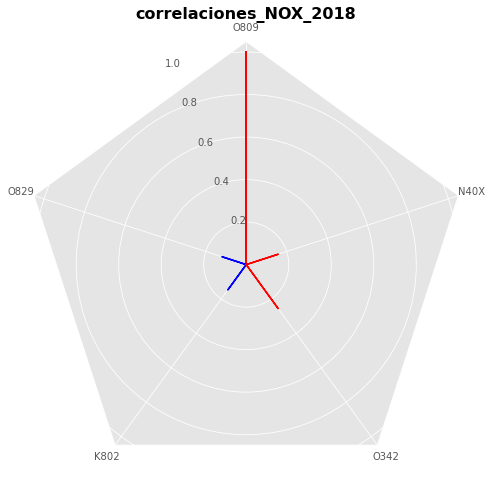

In [38]:
# Se importa el archivo creado
import visualization_spiderwebs

alldata = []
nd = len(datacorr)
for ii in range(nd):
    datatemp = []
    for yy in range(nd):
        if(ii==yy):
            datatemp.append(datacorr[ii])
        else: 
            datatemp.append(0)
    alldata.append(datatemp)
title = 'correlaciones_' + contaminante + '_' + año
visualization_spiderwebs.create_spiderwebs(alldata, 1, title, spoke_labels, colors, 'polygon')